In [22]:
import numpy as np 
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learnin

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)
# Hide warnings

import warnings
warnings.simplefilter('ignore')

In [4]:
train=pd.read_csv('data/train.csv')

In [6]:
train.shape

(42000, 785)

In [7]:
y = train['label']
X=train.drop(["label"],axis=1)

In [8]:
#Each image is 28 pixels wide and 28 pixles long. Reshaping to 28 x 28 x 1
X= X.values.reshape(-1,28,28,1)

In [9]:
# Normalizing the image 
X = X.astype("float32") / 255
X_test = test.astype("float32") / 255

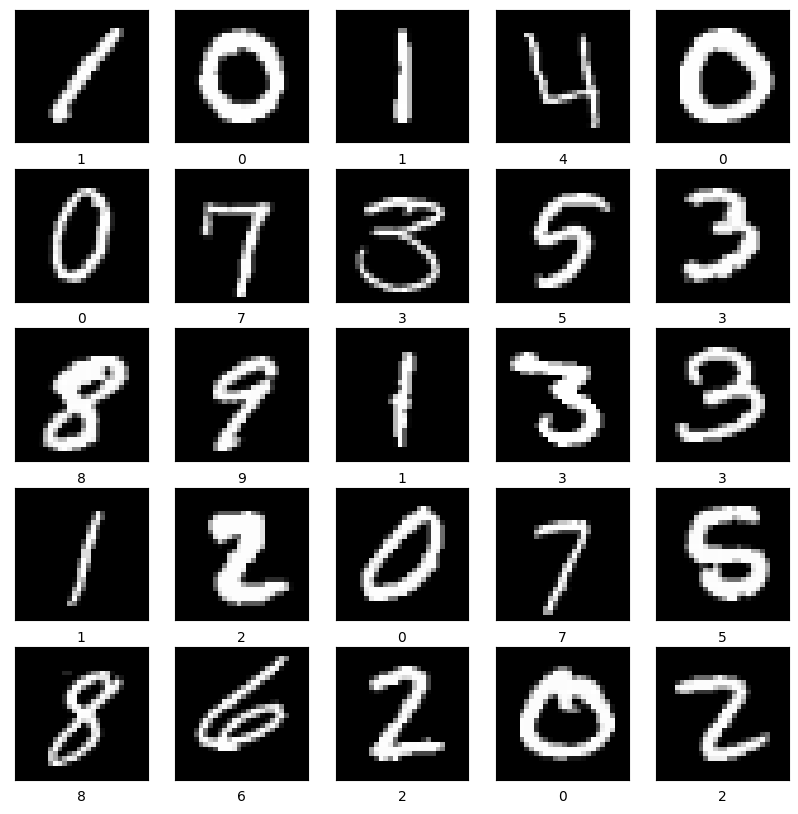

In [10]:
plt.figure(figsize=(10,10))
for i, image in enumerate(X[:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(train['label'][i])
plt.show()

In [11]:
num_classes = 10
input_shape = (28, 28, 1)

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2)

In [13]:
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_val = keras.utils.to_categorical(Y_val, num_classes)

In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [24]:
batch_size = 128
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
237/237 [==============================] - 8s 32ms/step - loss: 0.5323 - accuracy: 0.8371 - val_loss: 0.1344 - val_accuracy: 0.9616
Epoch 2/20
237/237 [==============================] - 8s 32ms/step - loss: 0.1525 - accuracy: 0.9529 - val_loss: 0.0864 - val_accuracy: 0.9744
Epoch 3/20
237/237 [==============================] - 7s 30ms/step - loss: 0.1129 - accuracy: 0.9658 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 4/20
237/237 [==============================] - 9s 36ms/step - loss: 0.0891 - accuracy: 0.9724 - val_loss: 0.0602 - val_accuracy: 0.9807
Epoch 5/20
237/237 [==============================] - 8s 36ms/step - loss: 0.0746 - accuracy: 0.9780 - val_loss: 0.0583 - val_accuracy: 0.9821
Epoch 6/20
237/237 [==============================] - 8s 36ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.0485 - val_accuracy: 0.9845
Epoch 7/20
237/237 [==============================] - 9s 36ms/step - loss: 0.0629 - accuracy: 0.9803 - val_loss: 0.0483 - val_accuracy: 0.9851

In [25]:
score = model.evaluate(X_val, Y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03474223241209984
Test accuracy: 0.9898809790611267


In [26]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

875/875 [==============================] - 3s 4ms/step


In [27]:
y_pred = pd.Series(y_pred, name='Label')

In [28]:
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)

In [29]:
sub.to_csv("submission.csv", index=False)

In [30]:
model.save('model/keras_model.ai')


INFO:tensorflow:Assets written to: model/keras_model.ai\assets


INFO:tensorflow:Assets written to: model/keras_model.ai\assets


In [31]:
import pickle

# Save the Model
pickle.dump(model, open('model/digit_recog.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-12 12:37:10         2765
metadata.json                                  2023-02-12 12:37:10           64
variables.h5                                   2023-02-12 12:37:10       447568


In [32]:

# Load the Model
loaded_model = pickle.load(open('model/digit_recog.pkl', 'rb'))
score = model.evaluate(X_val, Y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-12 12:39:28         2753
metadata.json                                  2023-02-12 12:39:28           64
variables.h5                                   2023-02-12 12:39:28       447568
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Test loss: 0.